# Classifying Whiskies

In this case study, we will classify scotch whiskies based on their flavor characteristics.
The dataset we'll be using consists of tasting ratings of one readily available single malt scotch whisky from almost every active whisky distillery in Scotland. The resulting dataset has 86 malt whiskies that are scored between 0 and 4 in 12 different taste categories. The scores have been aggregated from 10 different tasters. The taste categories describe whether the whiskies are sweet, smoky, medicinal, spicy, and so on.

In [1]:
import numpy as np
import pandas as pd

whisky = pd.read_csv("whiskies.txt")
whisky['Region'] = pd.read_csv("regions.txt")

In [2]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,PH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,AB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,AB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,PA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,AB54 4NH,355350,829140,Highlands


In [3]:
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands


In [4]:
whisky.iloc[0:10]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,PH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,AB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,AB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,PA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,AB54 4NH,355350,829140,Highlands
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,AB55 3XS,340754,848623,Speyside
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,AB55 3QY,340754,848623,Speyside
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,IV19 1LB,270820,885770,Highlands


In [5]:
whisky.iloc[5:10, 0:5]

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [6]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

In [7]:
flavors = whisky.iloc[:,2:14]

In [8]:
flavors.head(10)

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
5,2,3,1,1,0,1,1,1,0,1,1,2
6,0,2,0,0,0,1,1,0,2,2,3,3
7,2,3,1,0,0,2,1,2,2,2,2,1
8,2,2,1,0,0,1,0,0,2,2,2,2
9,2,3,2,1,0,0,2,0,2,1,2,1


In [9]:
corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

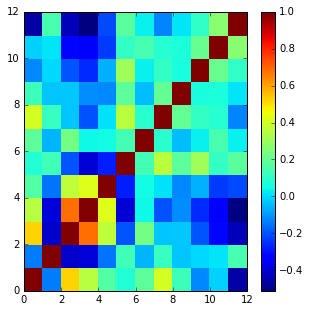

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.png")

In [11]:
flavors.transpose()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Body,2,3,1,4,2,2,0,2,2,2,...,2,4,1,1,2,1,2,0,2,2
Sweetness,2,3,3,1,2,3,2,3,2,3,...,3,2,2,3,2,1,3,3,2,3
Smoky,2,1,2,4,2,1,0,1,1,2,...,1,3,1,2,2,1,2,1,1,0
Medicinal,0,0,0,4,0,1,0,0,0,1,...,0,3,0,0,1,0,0,0,0,0
Tobacco,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Honey,2,4,2,0,1,1,1,2,1,0,...,0,1,2,0,0,1,2,2,1,0
Spicy,1,3,0,2,1,1,1,1,0,2,...,2,3,0,2,2,0,2,2,0,2
Winey,2,2,0,0,1,1,0,2,0,0,...,0,0,1,0,0,0,1,1,1,1
Nutty,2,2,2,1,2,0,2,2,2,2,...,2,1,1,2,0,1,1,1,2,1
Malty,2,3,2,2,3,1,2,2,2,1,...,1,2,2,1,0,2,2,2,1,2


In [12]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
corr_whisky.iloc[:5,:5]

,0,1,2,3,4
0,1.000000,0.708632,0.697354,-0.147311,0.731902
1,0.708632,1.000000,0.503074,-0.228591,0.511834
2,0.697354,0.503074,1.000000,-0.140435,0.557020
3,-0.147311,-0.228591,-0.140435,1.000000,0.231617
4,0.731902,0.511834,0.557020,0.231617,1.000000


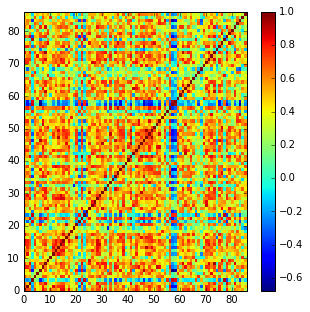

In [13]:
plt.figure(figsize=(5,5))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
plt.savefig("corr_whisky.png")

### Classification of whiskies based on flavor profiles: spectral co-clustering
we're going to use a clustering method from Scikit-learn modul called spectral co-clustering to find clusters of whiskeys in our correlation matrix of whiskey flavors.
Spectral refers to the fact that it uses eigenvalues and eigein vectors of a matrix. Also, co-clustering is simultaneous clustering the rows and columns of matrix.
This method effectively re-orders the rows and columns of the correlation
matrix so that we can see blocks corresponding to groups of whiskeys
more clearly. Since that whiskeys in the dataset come from six different regions,
we're going to ask the clustering algorithm to find six blocks.


In [14]:
from sklearn.cluster.bicluster import SpectralCoclustering

In [15]:
model = SpectralCoclustering(n_clusters=6, random_state=0)
#fit the model using data from the core whisky correlation matrix.
model.fit(corr_whisky)
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

Each row in this array identifies a cluster, here ranging from 0 to 5,and each column identifies a row in the correlation matrix, here ranging from 0 to 85.


If we sum all of the columns of this array,
we can find out how many observations belong to each cluster.

In [16]:
np.sum(model.rows_, axis=1)

array([20,  5, 19, 17,  6, 19])

17 whiskies belong to cluster 3

If instead we sum all of the rows, we can find out how many clusters belong to each observation.

In [17]:
np.sum(model.rows_, axis=0)
#Because each observation belongs in just one of the six clusters,
#the answer should be 1 for all of them.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
model.row_labels_
#All of the entries in the array have to be numbers 
#between 0 and 5 because we specified 6 clusters.


array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4, 3,
       4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2, 2, 0,
       5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2, 1, 5, 1,
       0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0], dtype=int32)

In [19]:
#extract the group labels from the model
#append them to the whisky table
#specify their index explicitly
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)

In [20]:
whisky['Group'].head()

0    5
1    2
2    3
3    4
4    5
Name: Group, dtype: int32

In [21]:
whisky['Group'].tail()

81    3
82    2
83    0
84    2
85    0
Name: Group, dtype: int32

In [22]:
# reorder the rows in increasing order by group labels.
whisky = whisky.ix[np.argsort(model.row_labels_)]

In [23]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
33,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
32,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
40,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
45,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0


In [24]:
# reset the index of the DataFrame
whisky = whisky.reset_index(drop=True)

In [25]:
whisky.iloc[:,2:14].transpose()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Body,2,2,2,1,1,1,2,1,2,2,...,2,3,2,2,2,1,2,1,2,2
Sweetness,3,3,3,3,3,2,3,3,2,1,...,1,2,2,3,2,2,3,2,2,2
Smoky,0,1,1,1,1,1,1,1,3,3,...,1,2,2,1,2,0,1,0,1,2
Medicinal,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
Tobacco,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Honey,0,2,1,0,0,1,2,2,2,0,...,1,3,2,2,1,1,2,1,2,2
Spicy,2,1,1,1,0,2,2,2,2,3,...,1,1,2,2,2,1,1,0,1,1
Winey,1,1,2,1,0,0,2,0,1,1,...,1,1,1,1,2,1,1,1,1,2
Nutty,1,1,0,1,0,0,1,1,1,0,...,2,2,2,2,2,2,4,2,2,2
Malty,2,1,2,2,2,2,2,2,1,2,...,1,3,2,1,2,2,2,1,2,2


In [26]:
#recalculate the correlation matrix
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
#turn the correlation matrix into a NumPy array
correlations = np.array(correlations)
correlations
#The reason for this step is that when we calculate the correlations,
#what pandas returns is a DataFrame.What we'd like to have is a NumPy array

array([[ 1.        ,  0.44904168,  0.46216816, ...,  0.50475261,
         0.34921515,  0.26722197],
       [ 0.44904168,  1.        ,  0.28977485, ...,  0.62335961,
         0.74444508,  0.7000808 ],
       [ 0.46216816,  0.28977485,  1.        , ...,  0.03309517,
         0.07784989,  0.16547585],
       ..., 
       [ 0.50475261,  0.62335961,  0.03309517, ...,  1.        ,
         0.76520727,  0.6626506 ],
       [ 0.34921515,  0.74444508,  0.07784989, ...,  0.76520727,
         1.        ,  0.76520727],
       [ 0.26722197,  0.7000808 ,  0.16547585, ...,  0.6626506 ,
         0.76520727,  1.        ]])

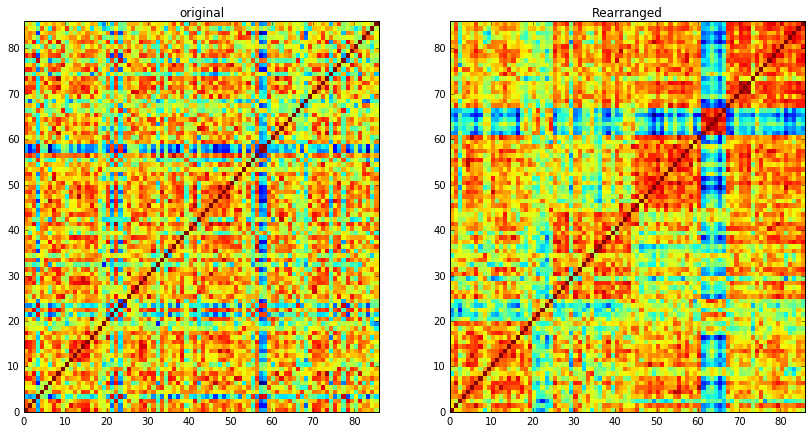

In [27]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("original")
plt.axis("tight")

plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")

plt.savefig("correlations.png")

If you follow the diagonal line on the right from the bottom-left corner to the top-right corner, you'll be able to see visually those six blocks of whiskies.


### prepare plots in Bokeh, a library designed for simple interactive plotting

In [28]:
# First, we import a tool to allow text to pop up on a plot when the cursor
# hovers over it.  Also, we import a data structure used to store arguments
# of what to plot in Bokeh.  Finally, we will use numpy for this section as well!

from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import output_file, show
from bokeh.plotting.figure import figure
import numpy as np

# Let's plot a simple 5x5 grid of squares, alternating in color as red and blue.

plot_values = [1,2,3,4,5]
plot_colors = ["red", "blue"]

# How do we tell Bokeh to plot each point in a grid?  Let's use a function that
# finds each combination of values from 1-5.
from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

# The first value is the x coordinate, and the second value is the y coordinate.
# Let's store these in separate lists.

xs, ys = zip(*grid)
print(xs)
print(ys)

# Now we will make a list of colors, alternating between red and blue.

colors = [plot_colors[i%2] for i in range(len(grid))]
print(colors)

# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.

alphas = np.linspace(0, 1, len(grid))

# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.

source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)
# We are ready to make our interactive Bokeh plot!

output_file("Basic_Example.html", title="Basic Example")
fig = figure(tools="resize, hover, save")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
    }
show(fig)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)
['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red']


In [29]:
cluster_colors = ["red", "orange", "green", "blue", "purple", "gray"]
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = dict(zip(regions, cluster_colors))
print(region_colors)

{'Islands': 'blue', 'Speyside': 'red', 'Islay': 'gray', 'Highlands': 'orange', 'Campbelltown': 'purple', 'Lowlands': 'green'}


correlations is a two-dimensional np.array with both rows and columns corresponding to distilleries and elements corresponding to the flavor correlation of each row/column pair. 

Low correlations among distillery pairs will be white, high correlations will be a distinct group color if the distilleries from the same group, and gray otherwise.

In [30]:
distilleries = list(whisky.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if correlations[i][j]<0.7:
            correlation_colors.append('white')         
        else:                                          
            if whisky.Group[i]==whisky.Group[j]:
                correlation_colors.append(cluster_colors[whisky.Group[i]])
            else:                                      
                correlation_colors.append('lightgray')  

In [31]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors,
        "correlations": correlations.flatten()
    }
)

output_file("Whisky Correlations.html", title="Whisky Correlations")
fig = figure(title="Whisky Correlations",
    x_axis_location="above", tools="resize,hover,save",
    x_range=list(reversed(distilleries)), y_range=distilleries)
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3

fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='correlations')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

In [32]:
points = [(0,0), (1,2), (3,1)]
xs, ys = zip(*points)
colors = ["red", "blue", "green"]

output_file("Spatial_Example.html", title="Regional Example")
location_source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
    }
)

fig = figure(title = "Title",
    x_axis_location = "above", tools="resize, hover, save")
fig.plot_width  = 300
fig.plot_height = 380
fig.circle("x", "y", 10, 10, size=10, source=location_source,
     color='colors', line_color = None)

hover = fig.select(dict(type = HoverTool))
hover.tooltips = {
    "Location": "(@x, @y)"
}
show(fig)

In [33]:
def location_plot(title, colors):
    output_file(title+".html")
    location_source = ColumnDataSource(
        data={
            "x": whisky[" Latitude"],
            "y": whisky[" Longitude"],
            "colors": colors,
            "regions": whisky.Region,
            "distilleries": whisky.Distillery
        }
    )

    fig = figure(title = title,
        x_axis_location = "above", tools="resize, hover, save")
    fig.plot_width  = 400
    fig.plot_height = 500
    fig.circle("x", "y", 10, 10, size=9, source=location_source,
         color='colors', line_color = None)
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type = HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    show(fig)


region_cols = [region_colors[i] for i in list(whisky.Region)]
classification_cols = [cluster_colors[i] for i in list(whisky.Group)]

location_plot("Whisky Locations and Regions", region_cols)
location_plot("Whisky Locations and Groups", classification_cols)



In [34]:
import pandas as pd 
data = pd.Series([1,2,3,4]) 
data = data.ix[[3,0,1,2]]
data = data.reset_index(drop=True)

Here is a quick tutorial of pandas which is a general library for manipulating 1d and 2d arrays of data of various types.
Pandas has two data structures: 
- Series is a one-dimensional array-like object,
- Data Frame is a two-dimensional array-like object.

In [35]:
import pandas as pd

x = pd.Series([6,3,8,6])
x

0    6
1    3
2    8
3    6
dtype: int64

In [36]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
x

q    6
w    3
e    8
r    6
dtype: int64

In [37]:
x["e"]

8

In [38]:
x[["r", "w"]]

r    6
w    3
dtype: int64

In [39]:
print(x.index,"\nsorted Index: ", sorted(x.index))

Index(['q', 'w', 'e', 'r'], dtype='object') 
sorted Index:  ['e', 'q', 'r', 'w']


In [40]:
x.reindex(sorted(x.index))

e    8
q    6
r    6
w    3
dtype: int64

In [41]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
y = pd.Series([10,5,6,1], index=["a", "b", "q", "w"])
x+y

a   NaN
b   NaN
e   NaN
q    12
r   NaN
w     4
dtype: float64

In [42]:
age = {"Tim":29, "Jim":31, "Pam":27, "Sam":35}

In [43]:
pd.Series(age)

Jim    31
Pam    27
Sam    35
Tim    29
dtype: int64

In [44]:
data = {'name':["Tim", "Jim", "Pam", "Sam"],
        'age':[29, 31, 27, 35],
       'ZIP': ['02119', '02130', '65768', '78797']}

In [45]:
x = pd.DataFrame(data, columns=["name", "age", "ZIP"])
x

,name,age,ZIP
0,Tim,29,02119
1,Jim,31,02130
2,Pam,27,65768
3,Sam,35,78797


In [46]:
x.name

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

In [47]:
 x["name"]

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object